# Mall Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Mall_Customers.csv")

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

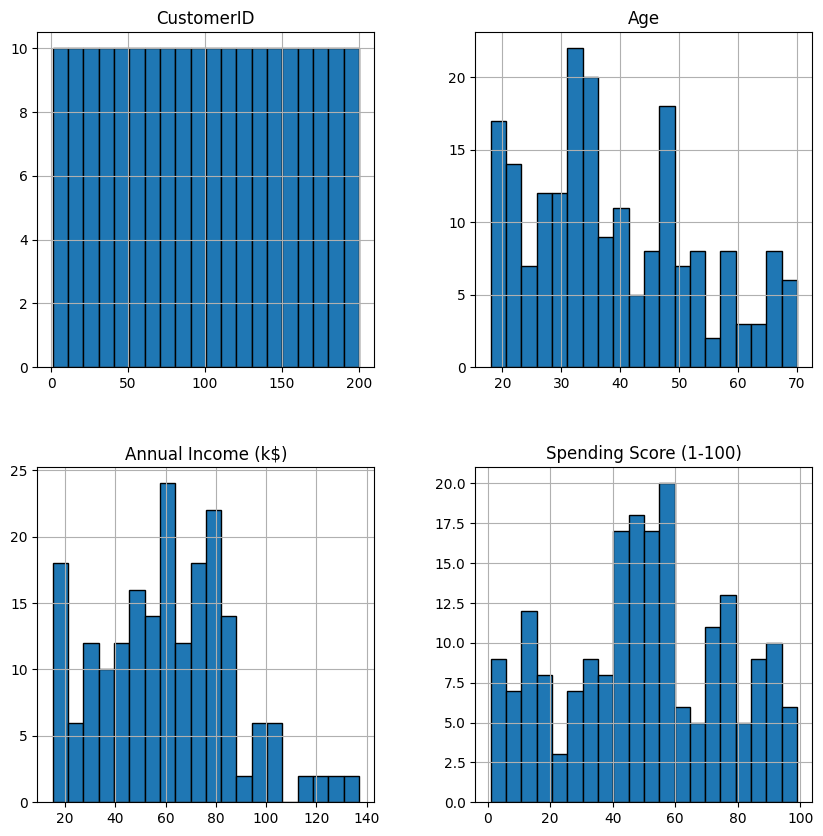

In [10]:
df.hist(bins=20, figsize=(10,10), edgecolor='black')
plt.show()

## Elbow Method

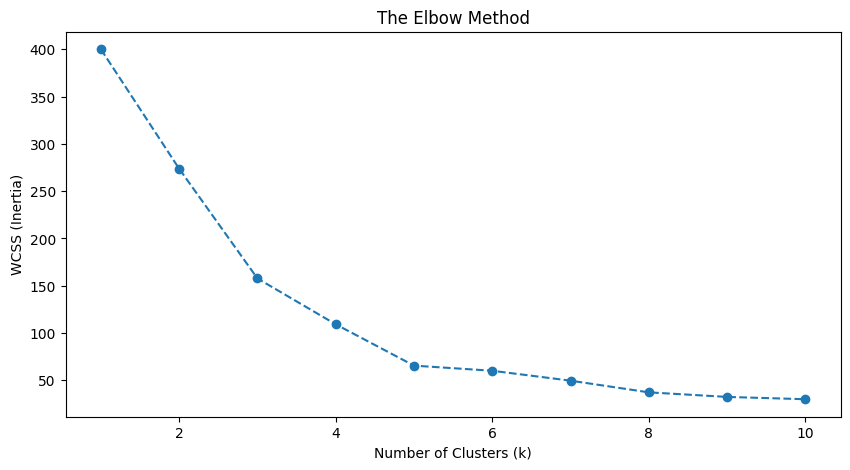

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Scaling (Crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = [] #Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

Our k = 5

In [12]:
#Applying K-Means with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


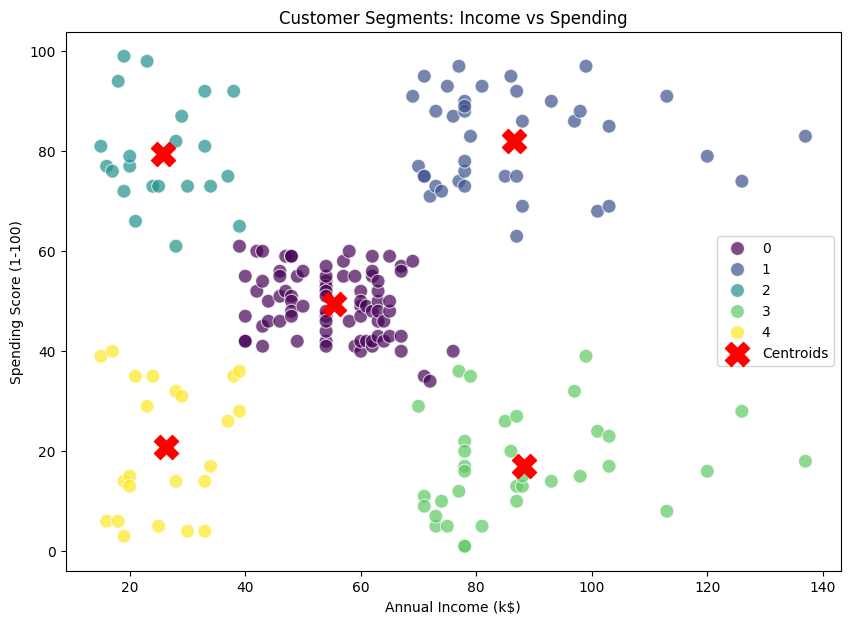

In [13]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100, alpha=0.7)

#We use scaler.inverse_transform to put centroids back into 'Dollars' and 'Score' units
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Customer Segments: Income vs Spending')
plt.legend()
plt.show()

In [14]:
analysis = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(analysis)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


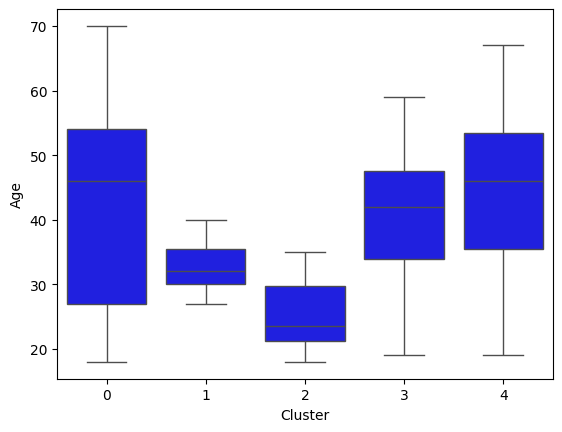

In [18]:
sns.boxplot(x='Cluster', y='Age', data=df, color='blue')
plt.show()

## Analysis

We see the final average values for our 5 different clusters and find meaning in them.


### Cluster 0 - Standard Class

- Medium Income Medium Spending group, with an average age of 43.
- Use standard advertising; they are consistent and reliable.

### Cluster 1 - VIP Class

- High Income High Spending group with an average age of 33.
- Offer exclusive "Platinum" memberships and early access to sales.

### Cluster 2 - Impulsive Shoppers

- Low Income High Spending
- Usually are youngsters, with an average age of 25.
- Reward them with discount vouchers to keep them coming back.
- Also advertise in a new "gen-z" way with social media memes and maybe small competitions

### Cluster 3 - Picky Shoppers

- High Income Low Spending
- Focus on luxury brand marketing; they have money but need a reason to spend.

### Cluster 4 - Budget Shoppers

- Low Income Low Spending
- Focus on "Value for Money" deals and bulk-buy discounts.
- Increase information of sales and access to shops as well